In [2]:
%pylab inline
from pandas import read_csv

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = read_csv("1987_top1000.csv")

In [4]:
df.head()


Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  1987     10          14          3      741         730      912   
1  1987     10          15          4      729         730      903   
2  1987     10          17          6      741         730      918   
3  1987     10          18          7      729         730      847   
4  1987     10          19          1      749         730      922   

   CRSArrTime UniqueCarrier  FlightNum    ...      TaxiIn  TaxiOut  Cancelled  \
0         849            PS       1451    ...         NaN      NaN          0   
1         849            PS       1451    ...         NaN      NaN          0   
2         849            PS       1451    ...         NaN      NaN          0   
3         849            PS       1451    ...         NaN      NaN          0   
4         849            PS       1451    ...         NaN      NaN          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0           NaN          NaN      NaN   
1               NaN         0           NaN          NaN      NaN   
2               NaN         0           NaN          NaN      NaN   
3               NaN         0           NaN          NaN      NaN   
4               NaN         0           NaN          NaN      NaN   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN  
4            NaN                NaN  

[5 rows x 29 columns]

In [5]:
df.ix[0]

Year                 1987
Month                  10
DayofMonth             14
DayOfWeek               3
DepTime               741
CRSDepTime            730
ArrTime               912
CRSArrTime            849
UniqueCarrier          PS
FlightNum            1451
TailNum               NaN
ActualElapsedTime      91
CRSElapsedTime         79
AirTime               NaN
ArrDelay               23
DepDelay               11
Origin                SAN
Dest                  SFO
Distance              447
TaxiIn                NaN
TaxiOut               NaN
Cancelled               0
CancellationCode      NaN
Diverted                0
CarrierDelay          NaN
WeatherDelay          NaN
NASDelay              NaN
SecurityDelay         NaN
LateAircraftDelay     NaN
Name: 0, dtype: object

In [6]:
print(df.ix[0]["ArrDelay"],max(df["CRSArrTime"]%100))

23.0 59


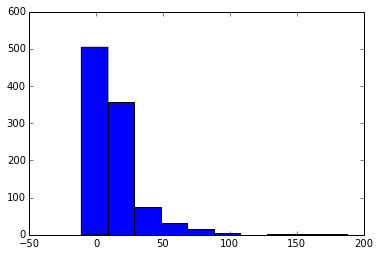

In [7]:
arrDelay = df["ArrDelay"].values
arrDelay = arrDelay[~np.isnan(arrDelay)]
hist(arrDelay);

In [8]:
median(arrDelay)

8.0

In [9]:
big_df = read_csv("1987.csv")

In [10]:
big_arrDelay = big_df["ArrDelay"].values
big_arrDelay = big_arrDelay[~np.isnan(big_arrDelay)]

In [11]:
len(big_arrDelay)

1288326

In [12]:
sum(big_arrDelay < -100)

109

We should look into those 109 ... but I'll just keep on going

In [13]:
big_arrDelay = big_arrDelay[~ (big_arrDelay < -100)]

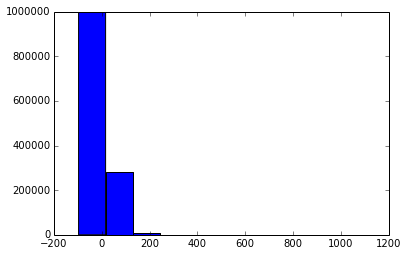

In [14]:
hist(big_arrDelay);

In [15]:
median(big_arrDelay)

4.0

In [16]:
mean(big_arrDelay)

9.5032894302745579

In [17]:
mean(big_arrDelay>0)

0.62737333849809462

In [18]:
mean(big_arrDelay>=15)

0.24279294559845119

In [19]:
big_delay = big_df[big_df["ArrDelay"]>0]
print("number", len(big_delay))
print(sum(big_delay["Month"] >= 10), "\n")
#,big_delay["DayofMonth"])

number 808193
808193 



In [20]:
sum(big_df["Month"] >= 10)

1311826

In [21]:
sum(big_df["Month"] >= 0)

1311826

In [22]:
len(set(big_df["Origin"]))

237

In [26]:
origins = list(set(big_df["Origin"]))
origins[0]

'FLG'

In [35]:
import pickle

```
num_origins = {}
for origin in origins:
    temp_df = big_df[big_df["Origin"] == origin]   
    num_origins[origin] = {'total' :len(temp_df), 'percent_late':mean(temp_df["ArrDelay"]>=15)}
   
pickle.dump(num_origins, open("1987num_origins.pickle", "wb"))
```

In [66]:
num_origins = pickle.load(open( "1987num_origins.pickle", "rb" ))
#num_origins

In [53]:
from pandas import DataFrame

In [58]:
origin_df = DataFrame(num_origins).T

In [60]:
origin_df.head()

percent_late  total
ABE      0.143879   1258
ABQ      0.193110   7866
ACV      0.451895    343
AGS      0.158933    862
ALB      0.242300   2922

In [62]:
origin_df[origin_df["percent_late"]>0.3]

percent_late  total
ACV      0.451895    343
BWI      0.304458  16242
CLT      0.338975  24518
CVG      0.364723  15483
DAY      0.307701   9259
EUG      0.311224   1176
GUC      0.379310     29
HDN      0.359375     64
JFK      0.302860  12273
KOA      0.314465    159
LAX      0.351400  45646
LGB      0.339774   2122
LYH      0.310811    444
MFR      0.345367    831
MHT      0.342056    535
MLU      0.302508    638
PIR      1.000000      1
RDD      0.380117    342
SFO      0.371839  35155
SIT      0.340426    282
STX      0.356841    709

In [63]:
sum(origin_df[origin_df["percent_late"]>0.24]["total"])

166251.0

In [68]:
sum(origin_df[origin_df["percent_late"]>=0.0]["total"])

1311826.0

In [69]:
sum(origin_df[origin_df["percent_late"]>0.24]["total"])/sum(origin_df[origin_df["percent_late"]>=0.0]["total"])

0.4836426477291958

In [80]:
mean(big_df["ArrDelay"] < 15)

0.74366265038198665

In [86]:
predict_df = DataFrame({"delayed":big_df["ArrDelay"] >= 15})
predict_df["prediction"] = False
mean(predict_df["delayed"] == predict_df["prediction"])

0.76157661153232215

In [87]:
SFO = big_df[big_df["Origin"] == "SFO"]
len(SFO)

35155

In [106]:
mean((SFO["ArrDelay"] >= 15) & (SFO["UniqueCarrier"] != "UA"))

0.24133124733323852

In [111]:
UA = SFO[SFO["UniqueCarrier"] == "UA"]
mean(UA["ArrDelay"] >=  15)

0.37783084904883474

In [113]:
carriers = list(set(big_df["UniqueCarrier"]))
len(carriers)

14

In [129]:
#num_carriers = {}
#for carrier in carriers:
#    print(carrier)
#    temp_df = big_df[big_df["UniqueCarrier"] == carrier] 
    
#    num_carriers[carrier] = {'total' :len(temp_df), 'percent_late':mean(temp_df["ArrDelay"]>=15)}
#len(num_carriers)
#pickle.dump(num_carriers, open("1987num_carriers.pickle", "wb"))

TW
HP
EA
PA (1)
DL
PI
US
AA
CO
NW
PS
WN
AS
UA


In [130]:
num_carriers = pickle.load(open( "1987num_carriers.pickle", "rb" ))
carrier_df = DataFrame(num_carriers).T
carrier_df.head()

percent_late   total
AA      0.177143  165121
AS      0.287349   21406
CO      0.230427  123002
DL      0.289921  185813
EA      0.206792  108776

In [133]:
carrier_df[carrier_df["percent_late"]>0.15]

percent_late   total
AA          0.177143  165121
AS          0.287349   21406
CO          0.230427  123002
DL          0.289921  185813
EA          0.206792  108776
HP          0.225313   45399
NW          0.270086  108273
PA (1)      0.216324   16785
PI          0.242604  116482
PS          0.339687   41706
TW          0.244968   69650
UA          0.230717  152624
US          0.248887   94814
WN          0.181670   61975

In [137]:
#num_time = {}
#times = [(0,700),(700,900),(900,1100),(1100,1300),(1300,1500),(1500,1700),(1700,1900),(1900,2100),(2100,2400)]
#for a, b in times:
#    print(a,b)
#    temp_df = big_df[(big_df["CRSDepTime"] >= a) & (big_df["CRSDepTime"] < b)]     
#    num_time[a] = {'total' :len(temp_df), 'percent_late':mean(temp_df["ArrDelay"]>=15)}
#len(num_carriers)
#pickle.dump(num_time, open("1987num_time.pickle", "wb"))


0 700
700 900
900 1100
1100 1300
1300 1500
1500 1700
1700 1900
1900 2100
2100 2400


In [139]:
num_time = pickle.load(open( "1987num_time.pickle", "rb" ))
time_df = DataFrame(num_time).T
time_df

percent_late   total
0         0.139818   67073
700       0.179560  196380
900       0.223153  160818
1100      0.230005  162740
1300      0.231661  166286
1500      0.264395  159791
1700      0.291973  181859
1900      0.289825  137728
2100      0.265657   79151